In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Temperature
ds_TEMP = xr.open_dataset('/glade/scratch/mauricio/Data/LENS2/TEMP/TEMP_south_atl_regions.nc')
ds_TEMP.coords['z_t']=ds_TEMP.coords['z_t']*-0.01
# Temperature
ds_SALT = xr.open_dataset('/glade/scratch/mauricio/Data/LENS2/SALT/SALT_south_atl_regions.nc')
ds_SALT.coords['z_t']=ds_SALT.coords['z_t']*-0.01
# SHF
ds_SHF = xr.open_dataset('/glade/scratch/mauricio/Data/LENS2/SHF/SHF_south_atl_regions.nc')

### TEMPERATURE

In [3]:
def split_depth_plot(da, 
                     ax_top, 
                     ax_bottom, 
                     depth):
    # Make sure the colour range is the same for the top and bottom plots
    mn = -4#da.min()
    mx = 4#da.max()
    orig_map=plt.cm.get_cmap('RdGy')
    scale_cor=orig_map.reversed()
    N = 50
    
    # Plot the top half
    da.sel(z_t=slice(0,depth)).plot.contourf('time','z_t', vmin=mn, vmax=mx,
                                                add_colorbar=False, 
                                                levels=np.linspace(mn, mx, N),
                                                ax=ax_top, cmap=scale_cor, add_labels=False) 
    CS=da.sel(z_t=slice(0,depth)).plot.contour('time','z_t', vmin=mn, vmax=mx,
                                            add_colorbar=False, 
                                            levels = [-.1,0,0.1,2],
                                            ax=ax_top, #colors=('k',),
                                            kwargs=dict(inline=True),
                                            colors=['blue', 'black', 'orange','red'],
                                            add_labels=True)
    ax_bottom.clabel(CS)
    
    # Remove x axis labels from the top
    #ax_top.tick_params(axis='x', bottom=False, labelbottom=False)
    
    
    # Plot the bottom half
    im=da.sel(z_t=slice(depth,None)).plot.contourf('time','z_t', vmin=mn, vmax=mx,
                                                add_colorbar=False, 
                                                levels=np.linspace(mn, mx, N),
                                                ax=ax_bottom, cmap=scale_cor, add_labels=False) 
    CS=da.sel(z_t=slice(depth,None)).plot.contour('time','z_t', vmin=mn, vmax=mx,
                                               add_colorbar=False, 
                                               levels = [-.1,0,.1,2],
                                               colors=['blue', 'black', 'orange','red'],
                                               kwargs=dict(inline=True),
                                               ax=ax_bottom, add_labels=True)
    ax_bottom.clabel(CS)
    plt.grid(color='gray', linestyle='-', linewidth=0.7)
    return im

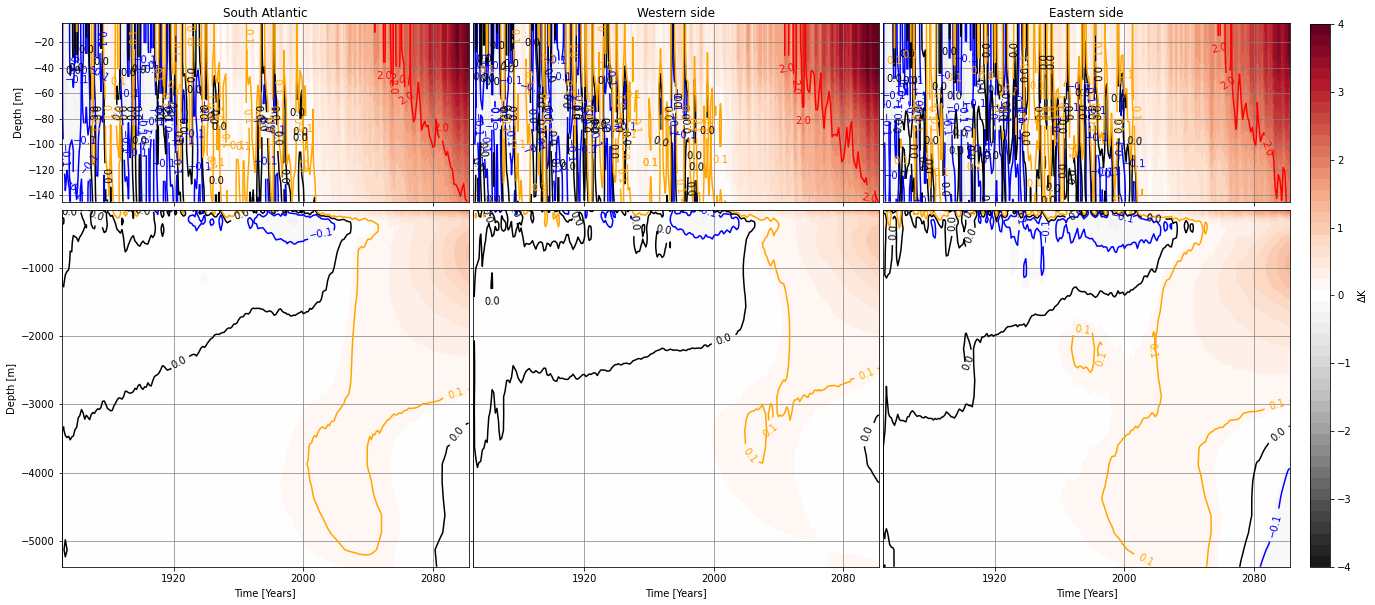

In [4]:
# 2 rows, 2 columns with no margin

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[22, 10])

gs = matplotlib.gridspec.GridSpec(2, 3, hspace=0.03, wspace=0.01, height_ratios=(2, 4))

# South Atlantic 
split_depth_plot(
    ds_TEMP.south_atl_TEMP.isel(member_id=10), plt.subplot(gs[0,0]), plt.subplot(gs[1,0]), depth=-150)

# Western Side
split_depth_plot(
    ds_TEMP.east_south_atl_TEMP.isel(member_id=10), plt.subplot(gs[0,1]), plt.subplot(gs[1,1]), depth=-150)

# Eastern Side
im=split_depth_plot(
    ds_TEMP.west_south_atl_TEMP.isel(member_id=10), plt.subplot(gs[0,2]), plt.subplot(gs[1,2]), depth=-150)

ax1=plt.subplot(gs[0,0]); ax4=plt.subplot(gs[1,0]);
ax2=plt.subplot(gs[0,1]); ax5=plt.subplot(gs[1,1]);
ax3=plt.subplot(gs[0,2]); ax6=plt.subplot(gs[1,2]);

ax1.grid(color='gray', linestyle='-', linewidth=0.7)
ax2.grid(color='gray', linestyle='-', linewidth=0.7)
ax3.grid(color='gray', linestyle='-', linewidth=0.7)
ax3.set_yticklabels([]); ax2.set_yticklabels([]); ax5.set_yticklabels([]); ax6.set_yticklabels([])

axins = inset_axes(ax6,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0, 1, 1.52),
                   bbox_transform=ax6.transAxes,
                   borderpad=0,
                   )

orig_map=plt.cm.get_cmap('RdGy')
scale_cor=orig_map.reversed()


#ticks = np.linspace(-1, int(0.1), 1, endpoint=True)

#cb = plt.colorbar(ticks=ticks)

cbar=fig.colorbar(im,cax=axins, cmap=scale_cor, ticks=[-4,-3,-2,-1,0,1,2,3,4], label='$\Delta$K')

#cbar.set_ticks([-1,4])

#cbar.set_ticklabels([-1,0,4])

ax4.set_xlabel('Time [Years]'), ax5.set_xlabel('Time [Years]'); ax6.set_xlabel('Time [Years]')

ax1.set_ylabel('Depth [m]'), ax4.set_ylabel('Depth [m]');

ax5.set(ylabel=None); ax6.set(ylabel=None)

ax2.set(ylabel=None); ax3.set(ylabel=None)

ax1.set_title('South Atlantic'); ax2.set_title('Western side'); ax3.set_title('Eastern side') 

ax4.set_title(None); ax5.set_title(None); ax6.set_title(None) 

ax1.xaxis.set_ticklabels([]); ax2.xaxis.set_ticklabels([]); ax3.xaxis.set_ticklabels([])

plt.savefig('Hovmoller_Diagram_Temperature_single_member.png',dpi=300,bbox_inches='tight')
plt.show()

In [5]:
def split_depth_plot(da, 
                     ax_top, 
                     ax_bottom, 
                     depth):
    # Make sure the colour range is the same for the top and bottom plots
    mn = -0.4#da.min()
    mx = 0.4#da.max()
    orig_map=plt.cm.get_cmap('BrBG')
    scale_cor=orig_map.reversed()
    N = 50
    
    # Plot the top half
    da.sel(z_t=slice(0,depth)).plot.contourf('time','z_t', vmin=mn, vmax=mx,
                                                add_colorbar=False, 
                                                levels=np.linspace(mn, mx, N),
                                                ax=ax_top, cmap=scale_cor, add_labels=False) 
    CS=da.sel(z_t=slice(0,depth)).plot.contour('time','z_t', vmin=mn, vmax=mx,
                                            add_colorbar=False, 
                                            levels = [-.01,0,0.01,0.2],
                                            ax=ax_top, #colors=('k',),
                                            kwargs=dict(inline=True),
                                            colors=['darkcyan', 'black','orange','darkred'],
                                            add_labels=True)
    ax_bottom.clabel(CS)
    
    # Remove x axis labels from the top
    #ax_top.tick_params(axis='x', bottom=False, labelbottom=False)
    
    
    # Plot the bottom half
    im=da.sel(z_t=slice(depth,None)).plot.contourf('time','z_t', vmin=mn, vmax=mx,
                                                add_colorbar=False, 
                                                levels=np.linspace(mn, mx, N),
                                                ax=ax_bottom, cmap=scale_cor, add_labels=False) 
    CS=da.sel(z_t=slice(depth,None)).plot.contour('time','z_t', vmin=mn, vmax=mx,
                                               add_colorbar=False, 
                                               levels = [-.01,0,.01,0.2],
                                            colors=['darkcyan', 'black','orange','darkred'],
                                               kwargs=dict(inline=True),
                                               ax=ax_bottom, add_labels=True)
    ax_bottom.clabel(CS)
    plt.grid(color='gray', linestyle='-', linewidth=0.7)
    return im

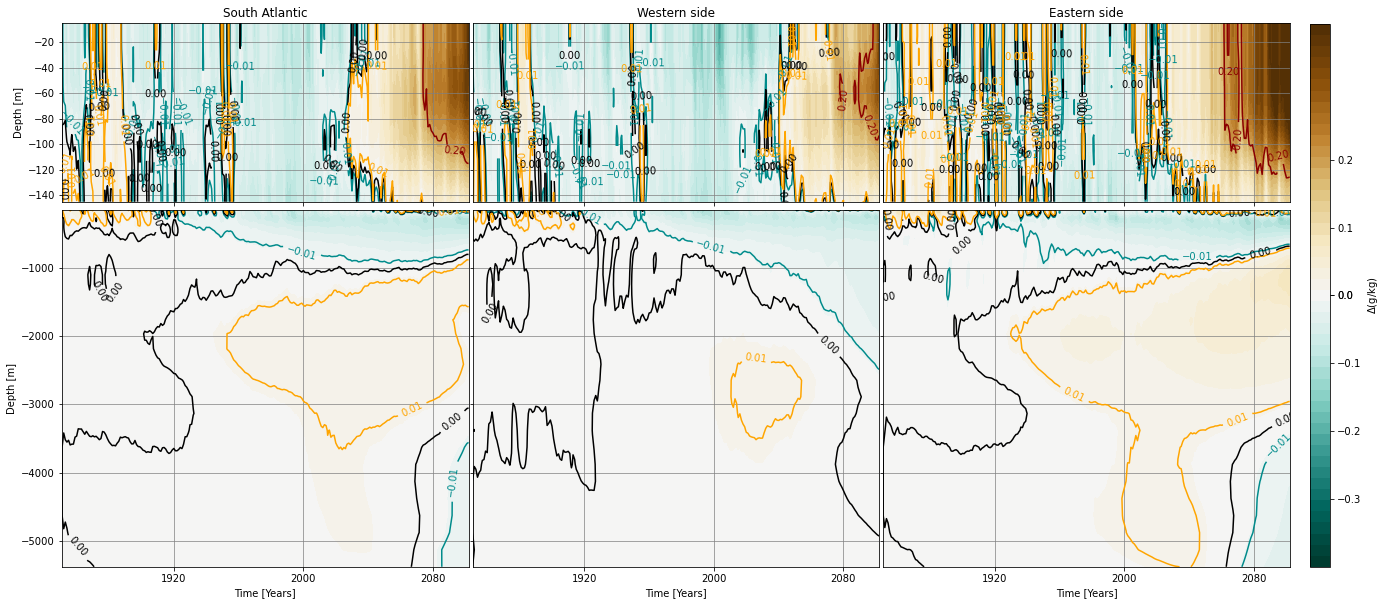

In [7]:
plt.close()
# 2 rows, 2 columns with no margin

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[22, 10])

gs = matplotlib.gridspec.GridSpec(2, 3, hspace=0.03, wspace=0.01, height_ratios=(2, 4))

# South Atlantic 
split_depth_plot(
    ds_SALT.south_atl_SALT.isel(member_id=10), plt.subplot(gs[0,0]), plt.subplot(gs[1,0]), depth=-150)

# Western Side
split_depth_plot(
    ds_SALT.east_south_atl_SALT.isel(member_id=10), plt.subplot(gs[0,1]), plt.subplot(gs[1,1]), depth=-150)

# Eastern Side
im=split_depth_plot(
    ds_SALT.west_south_atl_SALT.isel(member_id=10), plt.subplot(gs[0,2]), plt.subplot(gs[1,2]), depth=-150)

ax1=plt.subplot(gs[0,0]); ax4=plt.subplot(gs[1,0]);
ax2=plt.subplot(gs[0,1]); ax5=plt.subplot(gs[1,1]);
ax3=plt.subplot(gs[0,2]); ax6=plt.subplot(gs[1,2]);

ax1.grid(color='gray', linestyle='-', linewidth=0.7)
ax2.grid(color='gray', linestyle='-', linewidth=0.7)
ax3.grid(color='gray', linestyle='-', linewidth=0.7)
ax3.set_yticklabels([]); ax2.set_yticklabels([]); ax5.set_yticklabels([]); ax6.set_yticklabels([])

axins = inset_axes(ax6,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0, 1, 1.52),
                   bbox_transform=ax6.transAxes,
                   borderpad=0,
                   )

orig_map=plt.cm.get_cmap('BrBG')
scale_cor=orig_map.reversed()

#ticks = np.linspace(-1, int(0.1), 1, endpoint=True)

#cb = plt.colorbar(ticks=ticks)

cbar=fig.colorbar(im,cax=axins, cmap=scale_cor, ticks=[-0.3,-0.2,-0.1,0,0.1,0.2,0,3], label='$\Delta$(g/kg)')

#cbar.set_ticks([-1,4])

#cbar.set_ticklabels([-1,0,4])

ax4.set_xlabel('Time [Years]'), ax5.set_xlabel('Time [Years]'); ax6.set_xlabel('Time [Years]')

ax1.set_ylabel('Depth [m]'), ax4.set_ylabel('Depth [m]');

ax5.set(ylabel=None); ax6.set(ylabel=None)

ax2.set(ylabel=None); ax3.set(ylabel=None)

ax1.set_title('South Atlantic'); ax2.set_title('Western side'); ax3.set_title('Eastern side') 

ax4.set_title(None); ax5.set_title(None); ax6.set_title(None) 

ax1.xaxis.set_ticklabels([]); ax2.xaxis.set_ticklabels([]); ax3.xaxis.set_ticklabels([])

plt.savefig('Hovmoller_Diagram_Salinity_single_member.png',dpi=300,bbox_inches='tight')
plt.show()